#Punto 2 – Solución Sugerida


In [2]:
# Cargar las librerías necesarias
if (!require('caret')) install.packages('caret')
if (!require('e1071')) install.packages('e1071')
if (!require('pROC')) install.packages('pROC')


Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: e1071

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [3]:
if (!require('MLmetrics')) install.packages('MLmetrics')


Loading required package: MLmetrics

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘MLmetrics’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’




In [4]:
library(readxl)
library(caret)
library(MLmetrics)
library(pROC)
library(e1071)

Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall




In [8]:
set.seed(1234)
df <- read_excel('caso1a.xlsx')
str(df)

tibble [7,260 × 5] (S3: tbl_df/tbl/data.frame)
 $ Genero        : chr [1:7260] "FEMENINO" "FEMENINO" "MASCULINO" "FEMENINO" ...
 $ estadocivil   : chr [1:7260] "VIUDO" "CASADO" "SOLTERO" "SOLTERO" ...
 $ edad          : chr [1:7260] "51 - 60" "41 - 50" "41 - 50" "31 - 40" ...
 $ ViviendaPropia: chr [1:7260] "NO" "SI" "NO" "NO APLICA" ...
 $ compra        : chr [1:7260] "no" "no" "no" "si" ...


In [9]:
df$Genero <- as.factor(df$Genero)
df$estadocivil <- as.factor(df$estadocivil)
df$edad <- as.factor(df$edad)
df$ViviendaPropia <- as.factor(df$ViviendaPropia)
df$compra <- as.factor(df$compra)
str(df)

tibble [7,260 × 5] (S3: tbl_df/tbl/data.frame)
 $ Genero        : Factor w/ 2 levels "FEMENINO","MASCULINO": 1 1 2 1 2 1 1 1 2 2 ...
 $ estadocivil   : Factor w/ 6 levels "CASADO","DIVORCIADO",..: 6 1 4 4 1 6 4 4 1 4 ...
 $ edad          : Factor w/ 8 levels "0 - 17","18 - 22",..: 6 5 5 4 5 6 4 6 4 NA ...
 $ ViviendaPropia: Factor w/ 3 levels "NO","NO APLICA",..: 1 3 1 2 3 3 2 1 1 1 ...
 $ compra        : Factor w/ 2 levels "no","si": 1 1 1 2 1 2 1 1 2 1 ...


In [10]:
set.seed(1234)
sample_train <- sample.int(nrow(df), floor(0.75 * nrow(df)))
train_data <- df[sample_train, ]
test_data <- df[-sample_train, ]
str(train_data)

tibble [5,445 × 5] (S3: tbl_df/tbl/data.frame)
 $ Genero        : Factor w/ 2 levels "FEMENINO","MASCULINO": 1 2 1 1 2 1 1 2 2 2 ...
 $ estadocivil   : Factor w/ 6 levels "CASADO","DIVORCIADO",..: 1 4 4 1 1 1 4 1 4 4 ...
 $ edad          : Factor w/ 8 levels "0 - 17","18 - 22",..: 4 5 5 5 4 6 6 4 5 3 ...
 $ ViviendaPropia: Factor w/ 3 levels "NO","NO APLICA",..: 1 1 3 3 1 1 3 1 1 3 ...
 $ compra        : Factor w/ 2 levels "no","si": 1 1 2 1 1 1 2 1 2 2 ...


In [11]:
naive_model <- naiveBayes(compra ~ ., data = train_data)
pred_naive_prob <- predict(naive_model, test_data, type = "raw")

In [12]:
umbrales <- c(0.3, 0.5, 0.7)
for (umbral in umbrales) {
  pred_naive <- ifelse(pred_naive_prob[, 2] > umbral, 'si', 'no')
  pred_naive <- factor(pred_naive, levels = levels(test_data$compra))
  cat("Resultados para umbral de probabilidad =", umbral, ":\n")
  conf <- confusionMatrix(pred_naive, test_data$compra, positive = 'si')
  print(conf)
}


Resultados para umbral de probabilidad = 0.3 :
Confusion Matrix and Statistics

          Reference
Prediction  no  si
        no 767 140
        si 472 436
                                          
               Accuracy : 0.6628          
                 95% CI : (0.6405, 0.6846)
    No Information Rate : 0.6826          
    P-Value [Acc > NIR] : 0.9667          
                                          
                  Kappa : 0.3258          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7569          
            Specificity : 0.6190          
         Pos Pred Value : 0.4802          
         Neg Pred Value : 0.8456          
             Prevalence : 0.3174          
         Detection Rate : 0.2402          
   Detection Prevalence : 0.5003          
      Balanced Accuracy : 0.6880          
                                          
       'Positive' Class : 


- **Umbral = 0.3**:
  - **Accuracy**: 0.6628

- **Umbral = 0.5**:
  - **Accuracy**: 0.7185

- **Umbral = 0.7**:
  - **Accuracy**: 0.7278

El umbral de 0.7 es el seleccionado pues muestra el accuracy más alto: 0.7278

# PUNTO 3 CURVA ROC

Resultados para umbral de probabilidad = 1 :
          Reference
Prediction   no   si
        no 1239  576
        si    0    0
Resultados para umbral de probabilidad = 0.9 :
          Reference
Prediction   no   si
        no 1239  576
        si    0    0
Resultados para umbral de probabilidad = 0.8 :
          Reference
Prediction   no   si
        no 1239  576
        si    0    0
Resultados para umbral de probabilidad = 0.7 :
          Reference
Prediction   no   si
        no 1200  455
        si   39  121
Resultados para umbral de probabilidad = 0.6 :
          Reference
Prediction   no   si
        no 1140  412
        si   99  164
Resultados para umbral de probabilidad = 0.5 :
          Reference
Prediction   no   si
        no 1085  357
        si  154  219
Resultados para umbral de probabilidad = 0.4 :
          Reference
Prediction  no  si
        no 931 214
        si 308 362
Resultados para umbral de probabilidad = 0.3 :
          Reference
Prediction  no  si
        no 7

Setting levels: control = 0, case = 1

Setting direction: controls > cases



AUC = 0.7344633 


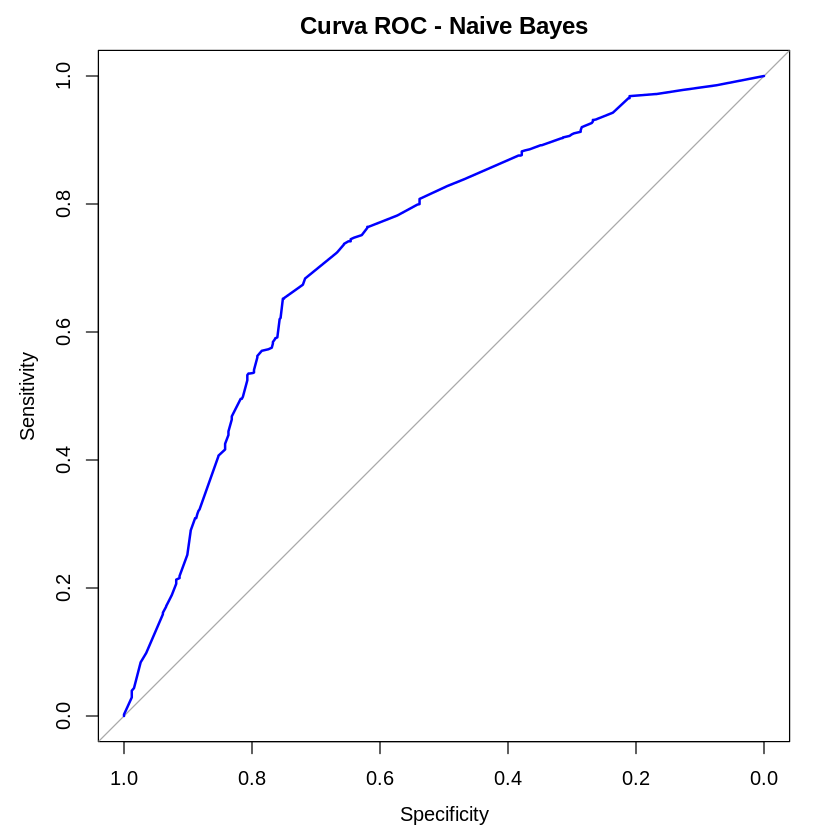

In [15]:
umbrales <- c(1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0)
for (umbral in umbrales) {
  pred_naive <- ifelse(pred_naive_prob[, 2] > umbral, 'si', 'no')
  pred_naive <- factor(pred_naive, levels = levels(test_data$compra))
  cat("Resultados para umbral de probabilidad =", umbral, ":\n")
  conf <- confusionMatrix(pred_naive, test_data$compra)
  #print(conf)
  print(conf$table)
}

library(pROC)
roc_curve <- roc(as.numeric(test_data$compra == 'no'), pred_naive_prob[, 2])
plot(roc_curve, col = "blue", main = "Curva ROC - Naive Bayes")
auc_value <- auc(roc_curve)
cat("AUC =", auc_value, "\n")